<a href="https://colab.research.google.com/github/movie112/DILAB/blob/main/220103/GPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GPT : Generative Pre-Training of a Language Model
- openAI     
https://www.cs.ubc.ca/~amuham01/LING530/papers/radford2018improving.pdf

## Idea
- unlabeled dataset이 풍부하고 labeled dataset은 많지 않다
- 지금까지 labeled dataset 위주로 학습을 해왔음
- unlabeled dataset을 잘 활용하면 supervised learning task에 대해 더 좋은 성능을 보이지 않을까? 

- unlabeled text corpora -> GPT를 통해 임베딩 벡터 생성해서 활용
- labeled text corpora for a specific task 에 대해 fine-tuning을 하게 되면 더 좋은 word vector를 만들 수 있지 않을까  



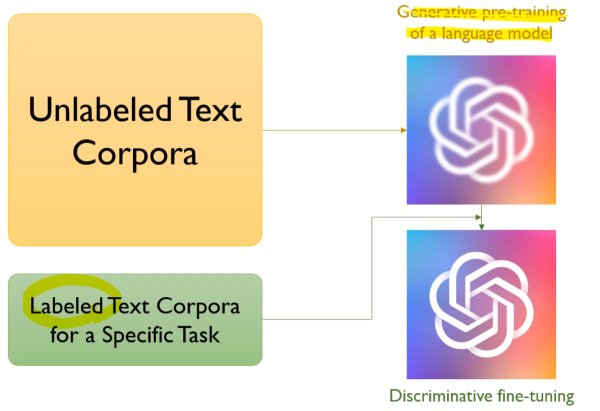

- gpt가 제시하는 문제점
  - unlabeled text에서 단어 레벨 이상의 정보를 사용하는 것은 challenging
    - unlabeled text만 가지고는 어떤 optimization objective(목적함수)가 transfer하는데 가장 효과적인지 찾기 힘듦
  - target task(분류, 유사도 등)가 주어졌을 때, 각각 task에 대해 transfer하는데 가장 효과적인 방식이 뭔지 모름
  - 이러한 불확실성은 semi-supervised fine-tuning 접근법을 어렵게 만듦

- ELMo와 idea는 같음
  - **ELMo**는 bidirectional language model-> task specific하게 hidden layer들의 가중치 결정
  - **GPT**는 transformer의 decoder block만 사용

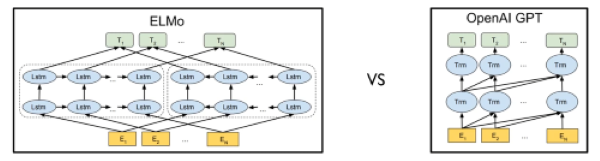

### GPT는!!
- unsupervised pre-training과 supervised fune-tunning을 결합한 **semi-supervise** 접근 사용
- 목표 : wide range of tasks에 약간의 조정만으로도 transfer할 수 있는 범용 representation을 학습하는 것
- 2 stage
  1. unlabeled data에서 LM objective 사용
  2. 이후 supervised objective에 해당하는 target task에 적용
- transformer 구조 사용
  - text의 long-term dependencies에 강인한 결과를 보임
  - 기존 RNN 등에 비해 구조화된 memory를 사용 가능
  - decoder 부분만 사용
---


## 1. Unsupervised pre-training

<img src='https://miro.medium.com/max/618/1*e-CXFf21YXykx28meXlw6g.png' width='400px' align='center'></img>

- 목적함수 L1(U)
  - 이전 것들 다 참고해서 i 번째 단어 likelihood 최대화!!
- k is the size of context window
- P is the conditional probability modeled using a neural network with parameter Θ


### a multi-layer Transformer decoder is used for language model

<img src='https://miro.medium.com/max/716/1*v0Xpjp4fjW_-5Ax8DV9_aQ.png' width='400px' align='center'></img>

- U : the context vector of tokens
- n : the number of layers
- W_e : token embedding matrix
- W_p : position embedding matrix


- decoding block을 올려 쌓는 것이 GPT의 Idea
  - 몇 개를 쌓느냐는 hyperparameter

<img src='https://machinelearningmastery.com/wp-content/uploads/2021/08/attention_research_1.png' width='235px' align='right'></img>

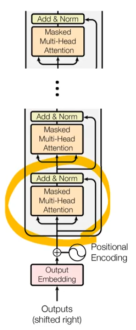



<img src='https://jalammar.github.io/images/gpt2/self-attention-and-masked-self-attention.png' width='600px' align='center'></img>

### 2. Supervised fine-tunning
- 우리가 실제로 수행하고자 하는 supervised task에 대한 dataset이 있을 때, 거기에 대해 fune-tunning을 하겠다.
- y라는 label을 가진 token들의 seqence(x1~xm)가 들어오면 
  1. input들은 pretrain된 model을 통해 final transformer block's activation(hm_l)을 생성
  2. hm_l을 linear output layer에 넣어서 예측
  - LM은 앞을 이용하여 다음 단어를 예측하는 것이었음
  - m개의 token으로 된 sequence와 정답 y가 주어졌을 때, decoder block의 마지막 hidden state의 m번 째 단어의 hidden state block을 가져다 **linear layer** -> **softmax** ->  확률 값 계산 
- L2 : token의 sequence에 따라 정답이 무엇인지에 대한 확률 값 최대화


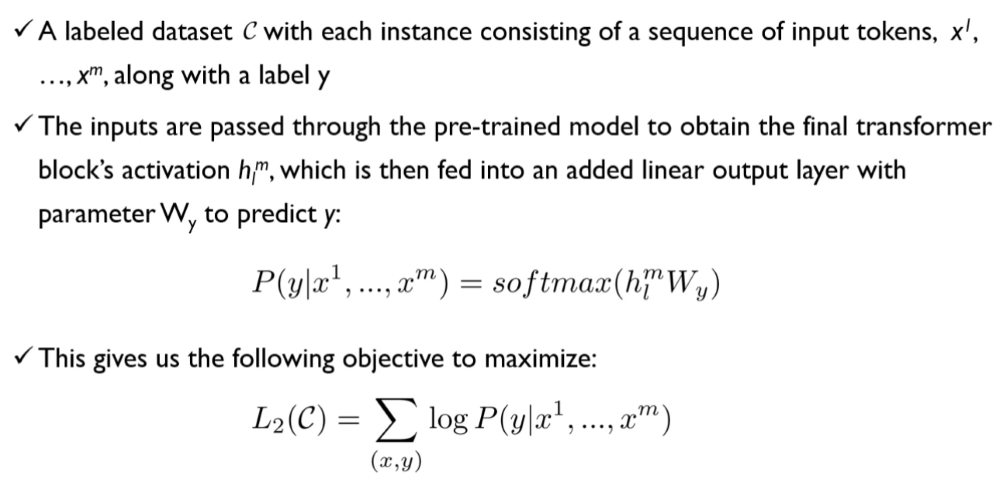

- 지도 다음 비지도 하겠다는 의미 X
  - ELMo : LM 먼저 만들고 hidden state vector 고정시키고 가중치만 조정해서 downstream task에 적절한 word vector 찾음
- L1(U) : 전체 unsupervised text corpus에 대한 LM의 목적함수 **pre-training** -> 우리가 가진 supervised task에 대한 coupus에 대해 L2, L1(fine-tunning) 함께 update
  - 장점
    1. improving gemeralization of the supervised model
    2. accelerating convergence 


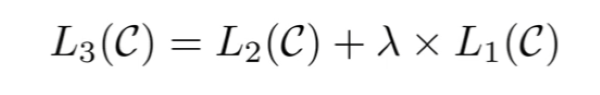

## GPT : Task-specific input transformations
- task에 따라 입력의 구조 다름

<img src='https://miro.medium.com/max/847/1*ciQy83mke5Fy7MRaQZ9B7A.png' width='700px'></img>

---
## background

### Category of learning
- 정답의 유무에 따라,,

#### supervised learning (지도학습)
- 객체들이 전부 x, y 에 대한 쌍이 존재
  - input: x / output(target): y 일대일로 존재
  


#### unsupervised learning (비지도 학습)
- x만 주어지고 target 변수(y) 없음
  - x를 통해 데이터의 특징, 분포

#### semi-supervised learning (SSL, 준지도 학습)
- x는 있고 y는 없는 데이터가 추가적으로 있음
- labeled data + unlabeled data

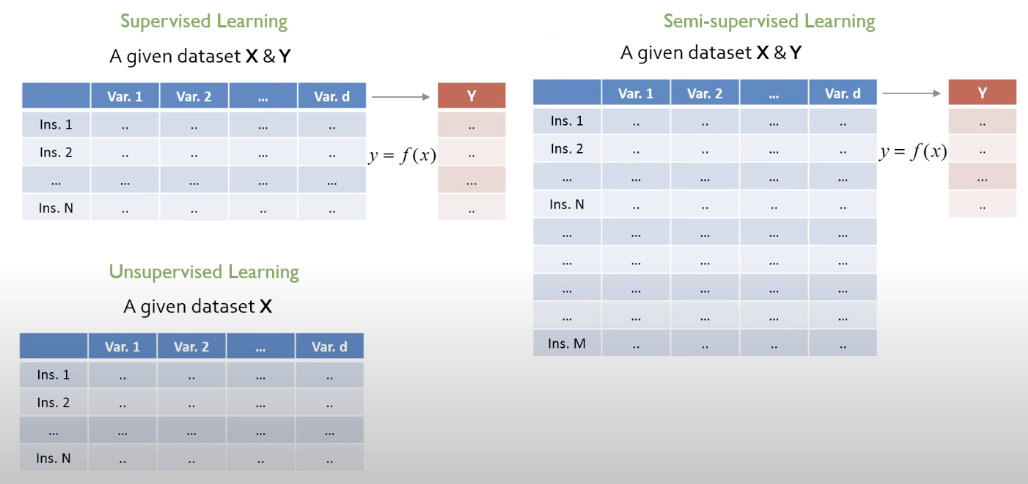

- unlabeled data를 사용하면 데이터의 분포를 더 자세하고 고려할 수 있음
  - 무조건 좋아지지는 않음 


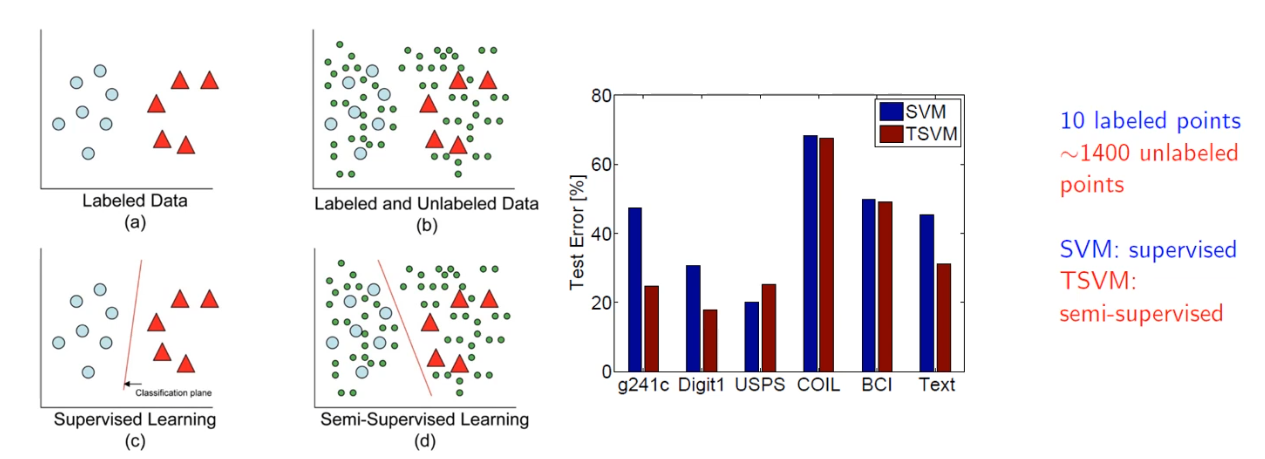

- 데이터가 어느정도 분포는 띄고 있어야 한다. 
  - left) 완벽하게 랜덤하게 uniform한 분포인 경우 도움을 주지 못함
  - right) class boundary 찾을 수 있음

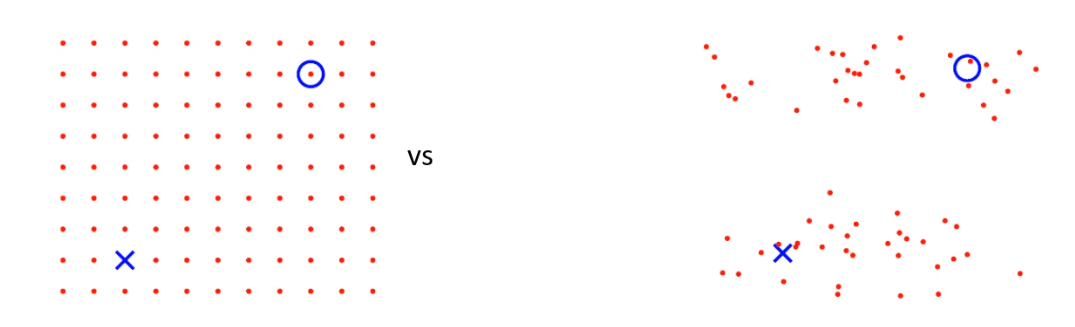

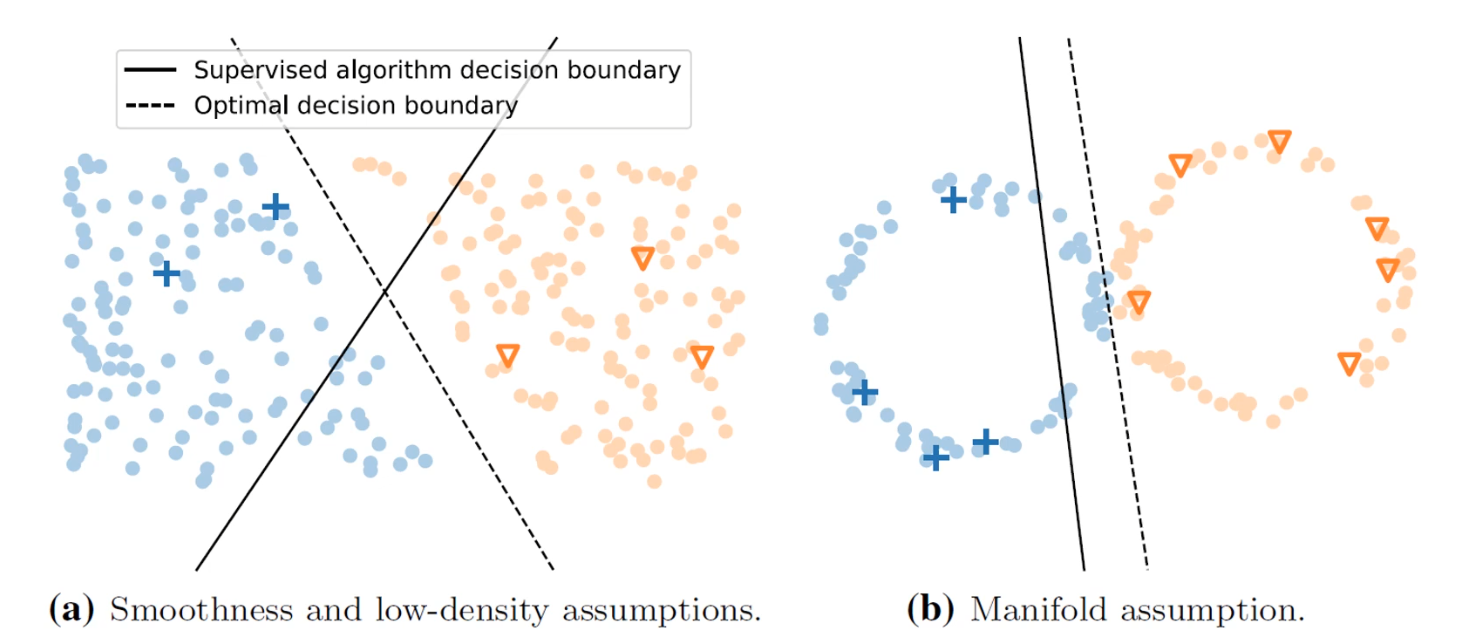